# Taller 1 - Procesamiento y Etiquetado de Datos

**Docente:** Ph.D. John William Branch  
**Asistente de Docencia:** Sergio Robles

Clasificación y Reconocimiento de Patrones  
Universidad Nacional - Sede Medellin

### Notas del Taller  
* Completar los cinco puntos propuestos
* El dataset a utilizar es el archivo comprimido enviado por correo junto con este notebook

#### Entrega
* El Notebook debe ser enviado al correo: srobles@unal.edu.co
* El Asunto del correo debe ser: CRP - Taller 1
* El Correo debe tener adjunto un Notebook resuelto (Archivo con extensión 'ipynb')
* El Correo debe tener adjunto 3 imagenes generadas a partir del último punto

## Librerías

Librerías y paquetes de python a utilizar en el siguiente notebook.  
(Deben estar previamente instalados)

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage as sk
from skimage import transform
from skimage import util
from sklearn import preprocessing
from scipy import ndarray

In [2]:
# Utils
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

## Datos No Estructurados

In [3]:
images = []
data = []

#### Primer punto

In [4]:
# Leer las 11 imagenes almacenadas en la ruta data/images y almacenarlas en el array images
# Tip: Utilizar opencv
# Tip: Las imagenes a través de opencv son leidas en formato BGR, cambiar el formato a RGB
for i in np.arange(1,12):
    imageName = '0'+str(i)+'.png'
    if(i>=10):
        imageName = str(i)+'.png'
    print(str(i)+":" +imageName)
    tempImg = cv2.imread('data/'+imageName)
    tempImg = cv2.cvtColor(tempImg,cv2.COLOR_BGR2RGB)
    images.append(tempImg)

1:01.png
2:02.png
3:03.png
4:04.png
5:05.png
6:06.png
7:07.png
8:08.png
9:09.png
10:10.png
11:11.png


#### Segundo punto

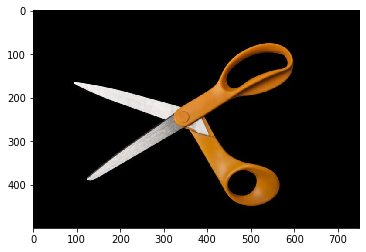

In [6]:
# Imprimir una imagen leida
# Tip: Utilizar matplotlib

plt.imshow(images[5])

### Normalización y Otros

#### Tercer punto

In [7]:
images_resize = []

In [8]:
# Realizar un resize a las imagenes almacenas y guardarlas en la variable images_resize (150x150)
# Tip: Utilizar opencv

for i in range(len(images)):
    images_resize.append(cv2.resize(images[i],(150,150)))

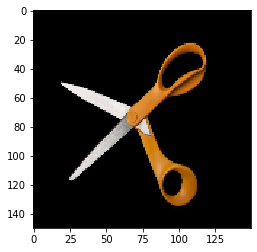

In [9]:
plt.imshow(images_resize[5]);

#### Cuarto punto

In [10]:
images_normalize = []

In [11]:
# Realizar un normalizado en la intensidad de colores en las imagenes almacenadas
# Tip: Utilizar opencv o matemáticas

for i in range(len(images_resize)):
    images_normalize.append(cv2.normalize(images_resize[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F))

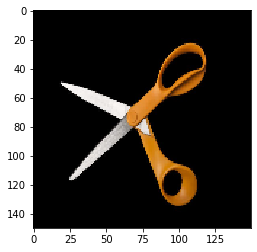

In [12]:
plt.imshow(images_normalize[5]);

### Etiquetado

#### Quinto punto

In [13]:
label = ['USB','BAG','COPY','STAPLER','BAG','SCISSORS','USB','STAPLER','COPY','STAPLER','COPY']

In [41]:
# Realizar un etiquetado manual de las imagenes almacenadas en la variable images y almacenarlos en la variable label
# Se deben guardar las imagenes en un diccionario de python, donde cada valor del diccionario es una lista de todas las imagenes que se encuentran en esa clase.
# Ejemplo: mis_datos = { 'perros': [imagen_perro1, imagen_perro2], 'gatos': [imagen_gato1, imagen_gato2] }

img_labels={}
for l in range(0,len(label)):
    if label[l] in img_labels:
        img_labels[label[l]].append(images[l])
    else:
        img_labels[label[l]] = [images[l]]

### Images augmentation

**Sexto punto**  
Utilizar el código para generar 2 nuevas imagenes por cada imagen que se tienen en el dataset. (Solo enviar 3 imagenes generadas)

In [42]:
images = images_normalize

In [79]:
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

augmentation_images = []
for img in images:
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        img = random.choice(list(images))
        transformed_image = available_transformations[key](img)
        num_transformations += 1
        augmentation_images.append(transformed_image)

In [80]:
cv2.imwrite('data/g_1.png',augmentation_images[5]*255)

True

In [81]:
cv2.imwrite('data/g_2.png',augmentation_images[4]*255)

True

In [84]:
cv2.imwrite('data/g_3.png',augmentation_images[2]*255)

True